<a href="https://colab.research.google.com/github/hmobley/satellite-water/blob/main/Part_2_DataAcquisitionAndPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data set 1: a time-series of cloudless sentinel-2 imagery

In [2]:
# define all the parameters
root = "https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&"
layers = 'layers=s2cloudless-2018&'
bbox = 'bbox=10.232263646327286,-0.670557747166987,10.334917149745255,-0.5679042437490183&'
width = 'width=4096&'
height = 'height=4096&'
srs = 'srs=epsg:4326'

# define the output
destination = 'example_image.jpg'

#construct and print the url
url = root+layers+bbox+width+height+srs
print(url)

https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=10.232263646327286,-0.670557747166987,10.334917149745255,-0.5679042437490183&width=4096&height=4096&srs=epsg:4326


In [3]:
import urllib.request
urllib.request.urlretrieve(url, destination)

('example_image.jpg', <http.client.HTTPMessage at 0x7fc18eb9b130>)

In [4]:
import os
os.remove(destination)

In [5]:
#Lake Poopo, Bolivia
site='poopo'
# bbox = 'bbox=-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051&'
# width = 'width=4096&'
# height = 'height=4096&'
# layers = ['layers=s2cloudless&', 'layers=s2cloudless-2018&']
# srs = 'srs=epsg:4326'
bbox = '-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051'
width = '4096'
height = '4096'
layers = ['s2cloudless', 's2cloudless-2018']
srs = 'epsg:4326'

In [6]:
layer = 'layers=s2cloudless&'
site+'_'+layer.split('=')[-1].split('&')[0]+'.jpg'

'poopo_s2cloudless.jpg'

In [7]:
def make_filename(site, layer):
    return F"{site}_{layer}.jpg"

In [ ]:
#download_all_layers(root,layers,bbox,width,height,srs,site)

In [8]:
year_layers = {2016:'s2cloudless',
               2017:'s2cloudless-2017',
               2018:'s2cloudless-2018'}

In [9]:
def download_all_layers(root,layers,bbox,width,height,srs,site):
    #cycle through each layer to download
    layers = [year_layers[x] for x in layers]
    for layer in layers:
        # construct a URL string 
        url = F"{root}layers={layer}&bbox={bbox}&width={width}&height={height}&srs={srs}"
        display(url)
        dest_filename = make_filename(site,layer)
        display(dest_filename)
        #download into a filename constructed as "site_layer.jpg"
        #+urllib.request.urlretrieve(url, site+'_'+layer.split('=')[-1].split('&')[0]+'.jpg')
        urllib.request.urlretrieve(url, dest_filename)

In [10]:
test = [2016,2017,2018]
[year_layers[x] for x in test]

['s2cloudless', 's2cloudless-2017', 's2cloudless-2018']

In [11]:
images = [{'site':'poopo', # Lake Poopo, Bolivia
           'bbox':'-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051',
           'width':width,'height':height,
           'layers':[2016,2018]},
           {'site':'urmia',  # Lake Urmia, Iran
           'bbox':'44.587725529095295,36.86436828406643,46.230181583782795,38.50682433875393',
           'width':width,'height':height,
           'layers':[2016,2017,2018]},
          {'site':'mead_mojave', # Lake Mead/ Lake Mojave, USA
           'bbox':'-115.42507235769445,34.94273489926993,-113.78261630300695,36.58519095395743',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'aral_sea', # Aral Sea, Kazahkstan
           'bbox':'58.032853536637845,43.955292007325,61.317765646012845,47.2402041167',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'copais', # Copais Lake, Greece
           'bbox':'23.214268551013436,38.36067354565393,23.350911007068124,38.4633270490719',
           'width':width,'height':height,
           'layers':[2016,2017,2018]},
          {'site':'ramganga', # Ramganga Lake, India
           'bbox':'78.63716910452058,29.468167756293038,78.91045401662996,29.673474763128976',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'qinghai', # Qinghai Lake, China 
           'bbox':'99.56471967977474,35.70094613663666,101.20168257039974,37.34340219132416',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'salton_sea', # Salton Sea, USA 
           'bbox':'-116.21928854749297,32.903320741965295,-115.40080710218047,33.724548769309045',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'faguibine', # Lake Faguibine, Mali
           'bbox':'-4.656089323623854,14.959306189862815,-3.0191264329988536,16.601762244550315',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'mono', # Mono Lake, USA
           'bbox':'-119.22357779576633,37.797192162208084,-118.81433707311008,38.20780617587996',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'walker', # Walker Lake, USA
           'bbox':'-118.82841344222616,38.58649115903216,-118.62379308089804,38.791798165868094',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'balaton', # Lake Balaton, Hungary
           'bbox':'17.138306471163226,46.438781725159295,18.231446119600726,47.260009752503045',
           'width':4096,'height':3084,
           'layers':[2016,2017,2018]},
          {'site':'koroneia', # Lake Koroneia, Greece
           'bbox':'23.34167375183668,40.56321556296156,23.614958663946055,40.7685225697975',
           'width':4096,'height':3084,
           'layers':[2016,2017,2018]},
          {'site':'salda', # Lake Salda, Turkey
           'bbox':'29.6337346568769,37.49763563391751,29.736044837540963,37.60028913733548',
           'width':4082,'height':4096,
           'layers':[2016,2017,2018]},
          {'site':'burdur', # Lake Burdur, Turkey
           'bbox':'30.008970333642345,37.6345355820376,30.373579098290783,37.83984258887354',
           'width':4096,'height':2312,
           'layers':[2016,2017,2018]},
          {'site':'mendocino', # Lake Mendocino, USA
           'bbox':'-123.19613698824355,39.189371563341254,-123.14498189791152,39.24069831505024',
           'width':4082,'height':4096,
           'layers':[2016,2018]},
          {'site':'elephant_butte', # Elephant Butte Reservoir, USA
           'bbox':'-107.23803910498334,33.14614806405013,-107.13572892431928,33.2488015674681',
           'width':4082,'height':4096,
           'layers':[2016,2018]},
          ]
#download_all_layers(root,layers,bbox,width,height,srs,'urmia')

In [12]:
!ls

sample_data


In [13]:
# clean up files
for info in images:
    for layer in info["layers"]:
        try:
            os.remove(make_filename(info["site"],layer))
        except OSError:
            pass

In [14]:
!ls

sample_data


In [15]:
for info in images:
    download_all_layers(root,info['layers'],info['bbox'],width,height,srs,info['site'])

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051&width=4096&height=4096&srs=epsg:4326'

'poopo_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051&width=4096&height=4096&srs=epsg:4326'

'poopo_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=44.587725529095295,36.86436828406643,46.230181583782795,38.50682433875393&width=4096&height=4096&srs=epsg:4326'

'urmia_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=44.587725529095295,36.86436828406643,46.230181583782795,38.50682433875393&width=4096&height=4096&srs=epsg:4326'

'urmia_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=44.587725529095295,36.86436828406643,46.230181583782795,38.50682433875393&width=4096&height=4096&srs=epsg:4326'

'urmia_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-115.42507235769445,34.94273489926993,-113.78261630300695,36.58519095395743&width=4096&height=4096&srs=epsg:4326'

'mead_mojave_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-115.42507235769445,34.94273489926993,-113.78261630300695,36.58519095395743&width=4096&height=4096&srs=epsg:4326'

'mead_mojave_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=58.032853536637845,43.955292007325,61.317765646012845,47.2402041167&width=4096&height=4096&srs=epsg:4326'

'aral_sea_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=58.032853536637845,43.955292007325,61.317765646012845,47.2402041167&width=4096&height=4096&srs=epsg:4326'

'aral_sea_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=23.214268551013436,38.36067354565393,23.350911007068124,38.4633270490719&width=4096&height=4096&srs=epsg:4326'

'copais_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=23.214268551013436,38.36067354565393,23.350911007068124,38.4633270490719&width=4096&height=4096&srs=epsg:4326'

'copais_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=23.214268551013436,38.36067354565393,23.350911007068124,38.4633270490719&width=4096&height=4096&srs=epsg:4326'

'copais_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=78.63716910452058,29.468167756293038,78.91045401662996,29.673474763128976&width=4096&height=4096&srs=epsg:4326'

'ramganga_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=78.63716910452058,29.468167756293038,78.91045401662996,29.673474763128976&width=4096&height=4096&srs=epsg:4326'

'ramganga_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=99.56471967977474,35.70094613663666,101.20168257039974,37.34340219132416&width=4096&height=4096&srs=epsg:4326'

'qinghai_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=99.56471967977474,35.70094613663666,101.20168257039974,37.34340219132416&width=4096&height=4096&srs=epsg:4326'

'qinghai_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-116.21928854749297,32.903320741965295,-115.40080710218047,33.724548769309045&width=4096&height=4096&srs=epsg:4326'

'salton_sea_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-116.21928854749297,32.903320741965295,-115.40080710218047,33.724548769309045&width=4096&height=4096&srs=epsg:4326'

'salton_sea_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-4.656089323623854,14.959306189862815,-3.0191264329988536,16.601762244550315&width=4096&height=4096&srs=epsg:4326'

'faguibine_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-4.656089323623854,14.959306189862815,-3.0191264329988536,16.601762244550315&width=4096&height=4096&srs=epsg:4326'

'faguibine_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-119.22357779576633,37.797192162208084,-118.81433707311008,38.20780617587996&width=4096&height=4096&srs=epsg:4326'

'mono_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-119.22357779576633,37.797192162208084,-118.81433707311008,38.20780617587996&width=4096&height=4096&srs=epsg:4326'

'mono_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-118.82841344222616,38.58649115903216,-118.62379308089804,38.791798165868094&width=4096&height=4096&srs=epsg:4326'

'walker_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-118.82841344222616,38.58649115903216,-118.62379308089804,38.791798165868094&width=4096&height=4096&srs=epsg:4326'

'walker_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=17.138306471163226,46.438781725159295,18.231446119600726,47.260009752503045&width=4096&height=4096&srs=epsg:4326'

'balaton_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=17.138306471163226,46.438781725159295,18.231446119600726,47.260009752503045&width=4096&height=4096&srs=epsg:4326'

'balaton_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=17.138306471163226,46.438781725159295,18.231446119600726,47.260009752503045&width=4096&height=4096&srs=epsg:4326'

'balaton_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=23.34167375183668,40.56321556296156,23.614958663946055,40.7685225697975&width=4096&height=4096&srs=epsg:4326'

'koroneia_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=23.34167375183668,40.56321556296156,23.614958663946055,40.7685225697975&width=4096&height=4096&srs=epsg:4326'

'koroneia_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=23.34167375183668,40.56321556296156,23.614958663946055,40.7685225697975&width=4096&height=4096&srs=epsg:4326'

'koroneia_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=29.6337346568769,37.49763563391751,29.736044837540963,37.60028913733548&width=4096&height=4096&srs=epsg:4326'

'salda_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=29.6337346568769,37.49763563391751,29.736044837540963,37.60028913733548&width=4096&height=4096&srs=epsg:4326'

'salda_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=29.6337346568769,37.49763563391751,29.736044837540963,37.60028913733548&width=4096&height=4096&srs=epsg:4326'

'salda_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=30.008970333642345,37.6345355820376,30.373579098290783,37.83984258887354&width=4096&height=4096&srs=epsg:4326'

'burdur_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2017&bbox=30.008970333642345,37.6345355820376,30.373579098290783,37.83984258887354&width=4096&height=4096&srs=epsg:4326'

'burdur_s2cloudless-2017.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=30.008970333642345,37.6345355820376,30.373579098290783,37.83984258887354&width=4096&height=4096&srs=epsg:4326'

'burdur_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-123.19613698824355,39.189371563341254,-123.14498189791152,39.24069831505024&width=4096&height=4096&srs=epsg:4326'

'mendocino_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-123.19613698824355,39.189371563341254,-123.14498189791152,39.24069831505024&width=4096&height=4096&srs=epsg:4326'

'mendocino_s2cloudless-2018.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=-107.23803910498334,33.14614806405013,-107.13572892431928,33.2488015674681&width=4096&height=4096&srs=epsg:4326'

'elephant_butte_s2cloudless.jpg'

'https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=-107.23803910498334,33.14614806405013,-107.13572892431928,33.2488015674681&width=4096&height=4096&srs=epsg:4326'

'elephant_butte_s2cloudless-2018.jpg'

In [16]:
!ls

aral_sea_s2cloudless-2018.jpg	     mendocino_s2cloudless.jpg
aral_sea_s2cloudless.jpg	     mono_s2cloudless-2018.jpg
balaton_s2cloudless-2017.jpg	     mono_s2cloudless.jpg
balaton_s2cloudless-2018.jpg	     poopo_s2cloudless-2018.jpg
balaton_s2cloudless.jpg		     poopo_s2cloudless.jpg
burdur_s2cloudless-2017.jpg	     qinghai_s2cloudless-2018.jpg
burdur_s2cloudless-2018.jpg	     qinghai_s2cloudless.jpg
burdur_s2cloudless.jpg		     ramganga_s2cloudless-2018.jpg
copais_s2cloudless-2017.jpg	     ramganga_s2cloudless.jpg
copais_s2cloudless-2018.jpg	     salda_s2cloudless-2017.jpg
copais_s2cloudless.jpg		     salda_s2cloudless-2018.jpg
elephant_butte_s2cloudless-2018.jpg  salda_s2cloudless.jpg
elephant_butte_s2cloudless.jpg	     salton_sea_s2cloudless-2018.jpg
faguibine_s2cloudless-2018.jpg	     salton_sea_s2cloudless.jpg
faguibine_s2cloudless.jpg	     sample_data
koroneia_s2cloudless-2017.jpg	     urmia_s2cloudless-2017.jpg
koroneia_s2cloudless-2018.jpg	     urmia_s2cloudless-2018.jpg
korone

In [22]:
#!cd sample_data/
#!ls
#!cd ..
#!pwd

In [40]:
## create a directory to move the images into. It is wrapped in a "try:except" loop 
## in case you have run this cell before and want to avoid errors
basepath = 's2cloudless_imagery'
datapath = os.path.join(basepath,'data')
print(datapath)
#!ls
try:
    os.mkdir(basepath)
    #os.mkdir('s2cloudless_imagery'+os.sep+'data')
    os.mkdir(datapath)
except:
    pass

s2cloudless_imagery/data


In [42]:
import shutil, glob, os
# cycle through each jpg image in the current directory
try:
    for f in glob.glob('*.jpg'):
        #move to the new directory
        if f.endswith('s2cloudless.jpg'): #2016 imagery
            shutil.move(f, os.path.join(datapath,f.replace('s2cloudless.jpg','s2cloudless-2016.jpg')))
            #shutil.move(f, 's2cloudless_imagery'+os.sep+'data'+os.sep+f.replace('s2cloudless.jpg','s2cloudless-2016.jpg'))
        else: #2017 or 2018 imagery
            shutil.move(f, datapath)
#            shutil.move(f, 's2cloudless_imagery'+os.sep+'data')
except:
    display('error')
    pass

In [48]:
# get a sorted list of all jpg files
filepaths = os.path.join(datapath,'*.jpg')
files = sorted(glob.glob(filepaths))
# define a list of sites
sites = ['aral_sea','balaton','burdur','copais','elephant_butte',
         'faguibine','koroneia','mead_mojave','mendocino','mono',
         'poopo','qinghai','ramganga','salda','urmia','walker']

In [54]:
#allocate F which will contain a list of file name lists
F = []
#cycle through each of the 17 sites
for site in sites:
    # append those files at each site
    F.append([f for f in files if f.startswith(os.path.join(datapath,site))])

In [55]:
!pip install rasterio
import rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
F_arrays = [] #initialize empty list
for f in F: #cycle through sites
    tmp = [] #make a temporary empty list
    for i in f: #cycle through files at each site
        with rasterio.open(i) as dataset: #open the file
            tmp.append(dataset.read().T) #read in and transpose channels
    F_arrays.append(tmp) #add to F_arrays

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [57]:
import matplotlib.pyplot as plt

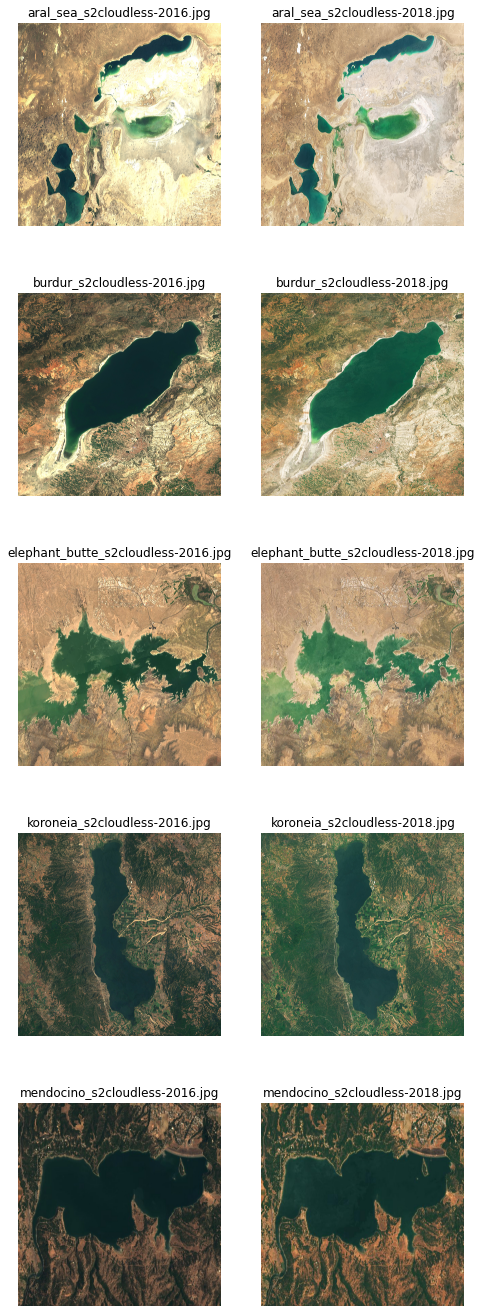

In [58]:
%matplotlib inline

# visualize some of the examples
fig = plt.figure(figsize=(8,24))
for i in range(1,10,2):
    plt.subplot(5,2,i)
    plt.imshow(F_arrays[i-1][0])
    plt.title(F[i-1][0].split(os.sep)[-1])
    plt.axis('off')
    plt.subplot(5,2,i+1)
    plt.imshow(F_arrays[i-1][-1])
    plt.title(F[i-1][-1].split(os.sep)[-1])
    plt.axis('off')
plt.show()

### Data set 2: NWPU-RESISC45 dataset of land covers and uses

In [71]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    print(token)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    """
    response = filename for input
    destination = filename for output
    """    
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [72]:
file_id = '14kkcuU6wd9UMvjaDrg3PNI-e_voCi8HL'
destination = 'NWPU_images.zip'
download_file_from_google_drive(file_id, destination)

None


In [70]:
!ls -la

total 24
drwxr-xr-x 1 root root 4096 Jan 12 01:12 .
drwxr-xr-x 1 root root 4096 Jan 12 00:40 ..
drwxr-xr-x 4 root root 4096 Jan 10 14:32 .config
-rw-r--r-- 1 root root 1642 Jan 12 01:26 NWPU_images.zip
drwxr-xr-x 3 root root 4096 Jan 12 00:49 s2cloudless_imagery
drwxr-xr-x 1 root root 4096 Jan 10 14:33 sample_data
